# Project: Wrangling and Analyze Data

In [1]:
# import necessary libraries
import pandas as pd
import numpy as np
import requests
import tweepy
import json

## Data Gathering
In the cell below, gather **all** three pieces of data for this project and load them in the notebook. **Note:** the methods required to gather each data are different.
1. Directly download the WeRateDogs Twitter archive data (twitter_archive_enhanced.csv)

In [2]:
# read in the first dataframe using read_csv()
twitter_archive = pd.read_csv('twitter-archive-enhanced.csv')
twitter_archive.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None


2. Use the Requests library to download the tweet image prediction (image_predictions.tsv)

In [3]:
# use request libraries to download the dataframe from the url
url = 'https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv'
response = requests.get(url)

with open("image_predictions", mode='wb') as file:
    file.write(response.content)

In [4]:
# read in the dataframe using read_csv()
image_predictions = pd.read_csv('image_predictions',sep='\t')
image_predictions.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


3. Use the Tweepy library to query additional data via the Twitter API (tweet_json.txt)

In [5]:
# I was not able to get my developer account approved, 
# even up until this moment of submission and so,
# I spoked with my session leader and I was asked
# to make use of the json file provided by Udacity.

# read in the json file as a dataframe
with open('tweet-json.txt') as d:
    lines = d.readlines()
data = []
for line in lines:
    data.append(json.loads(line))
json_twitter_archive = pd.DataFrame(data)

## Assessing Data
In this section, detect and document at least **eight (8) quality issues and two (2) tidiness issue**. You must use **both** visual assessment
programmatic assessement to assess the data.

**Note:** pay attention to the following key points when you access the data.

* You only want original ratings (no retweets) that have images. Though there are 5000+ tweets in the dataset, not all are dog ratings and some are retweets.
* Assessing and cleaning the entire dataset completely would require a lot of time, and is not necessary to practice and demonstrate your skills in data wrangling. Therefore, the requirements of this project are only to assess and clean at least 8 quality issues and at least 2 tidiness issues in this dataset.
* The fact that the rating numerators are greater than the denominators does not need to be cleaned. This [unique rating system](http://knowyourmeme.com/memes/theyre-good-dogs-brent) is a big part of the popularity of WeRateDogs.
* You do not need to gather the tweets beyond August 1st, 2017. You can, but note that you won't be able to gather the image predictions for these tweets since you don't have access to the algorithm used.



In [6]:
# take a look at the twitter_archive dataframe
twitter_archive

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2351,666049248165822465,NaN,NaN,2015-11-16 00:24:50 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a 1949 1st generation vulpix. Enj...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666049248...,5,10,None,None,None,None,None
2352,666044226329800704,NaN,NaN,2015-11-16 00:04:52 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a purebred Piers Morgan. Loves to Netf...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666044226...,6,10,a,None,None,None,None
2353,666033412701032449,NaN,NaN,2015-11-15 23:21:54 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here is a very happy pup. Big fan of well-main...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666033412...,9,10,a,None,None,None,None
2354,666029285002620928,NaN,NaN,2015-11-15 23:05:30 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a western brown Mitsubishi terrier. Up...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666029285...,7,10,a,None,None,None,None


In [7]:
# use .info() to assess the dataframe
twitter_archive.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2356 non-null   int64  
 1   in_reply_to_status_id       78 non-null     float64
 2   in_reply_to_user_id         78 non-null     float64
 3   timestamp                   2356 non-null   object 
 4   source                      2356 non-null   object 
 5   text                        2356 non-null   object 
 6   retweeted_status_id         181 non-null    float64
 7   retweeted_status_user_id    181 non-null    float64
 8   retweeted_status_timestamp  181 non-null    object 
 9   expanded_urls               2297 non-null   object 
 10  rating_numerator            2356 non-null   int64  
 11  rating_denominator          2356 non-null   int64  
 12  name                        2356 non-null   object 
 13  doggo                       2356 

In [8]:
# check for duplicate rows
twitter_archive[twitter_archive.duplicated()]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo


In [9]:
# check for missing values
twitter_archive.isnull().sum()

tweet_id                         0
in_reply_to_status_id         2278
in_reply_to_user_id           2278
timestamp                        0
source                           0
text                             0
retweeted_status_id           2175
retweeted_status_user_id      2175
retweeted_status_timestamp    2175
expanded_urls                   59
rating_numerator                 0
rating_denominator               0
name                             0
doggo                            0
floofer                          0
pupper                           0
puppo                            0
dtype: int64

In [10]:
# check the sumamry statistics for columns
twitter_archive.describe()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,retweeted_status_id,retweeted_status_user_id,rating_numerator,rating_denominator
count,2.356000e+03,7.800000e+01,7.800000e+01,1.810000e+02,1.810000e+02,2356.000000,2356.000000
mean,7.427716e+17,7.455079e+17,2.014171e+16,7.720400e+17,1.241698e+16,13.126486,10.455433
std,6.856705e+16,7.582492e+16,1.252797e+17,6.236928e+16,9.599254e+16,45.876648,6.745237
min,6.660209e+17,6.658147e+17,1.185634e+07,6.661041e+17,7.832140e+05,0.000000,0.000000
25%,6.783989e+17,6.757419e+17,3.086374e+08,7.186315e+17,4.196984e+09,10.000000,10.000000
50%,7.196279e+17,7.038708e+17,4.196984e+09,7.804657e+17,4.196984e+09,11.000000,10.000000
75%,7.993373e+17,8.257804e+17,4.196984e+09,8.203146e+17,4.196984e+09,12.000000,10.000000
max,8.924206e+17,8.862664e+17,8.405479e+17,8.874740e+17,7.874618e+17,1776.000000,170.000000


In [11]:
# check the unique rating_numerator values
twitter_archive.rating_numerator.unique()

array([  13,   12,   14,    5,   17,   11,   10,  420,  666,    6,   15,
        182,  960,    0,   75,    7,   84,    9,   24,    8,    1,   27,
          3,    4,  165, 1776,  204,   50,   99,   80,   45,   60,   44,
        143,  121,   20,   26,    2,  144,   88], dtype=int64)

In [12]:
# check the unique rating_denominator values
twitter_archive.rating_denominator.unique()

array([ 10,   0,  15,  70,   7,  11, 150, 170,  20,  50,  90,  80,  40,
       130, 110,  16, 120,   2], dtype=int64)

In [13]:
# take a look at the image_predictions dataframe
image_predictions

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True
...,...,...,...,...,...,...,...,...,...,...,...,...
2070,891327558926688256,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,2,basset,0.555712,True,English_springer,0.225770,True,German_short-haired_pointer,0.175219,True
2071,891689557279858688,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,1,paper_towel,0.170278,False,Labrador_retriever,0.168086,True,spatula,0.040836,False
2072,891815181378084864,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,1,Chihuahua,0.716012,True,malamute,0.078253,True,kelpie,0.031379,True
2073,892177421306343426,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,1,Chihuahua,0.323581,True,Pekinese,0.090647,True,papillon,0.068957,True


In [14]:
# use .info() to assess the dataframe
image_predictions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   tweet_id  2075 non-null   int64  
 1   jpg_url   2075 non-null   object 
 2   img_num   2075 non-null   int64  
 3   p1        2075 non-null   object 
 4   p1_conf   2075 non-null   float64
 5   p1_dog    2075 non-null   bool   
 6   p2        2075 non-null   object 
 7   p2_conf   2075 non-null   float64
 8   p2_dog    2075 non-null   bool   
 9   p3        2075 non-null   object 
 10  p3_conf   2075 non-null   float64
 11  p3_dog    2075 non-null   bool   
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [15]:
# check for duplicate rows
image_predictions[image_predictions.duplicated()]

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog


In [16]:
# check for missing values
image_predictions.isnull().sum()

tweet_id    0
jpg_url     0
img_num     0
p1          0
p1_conf     0
p1_dog      0
p2          0
p2_conf     0
p2_dog      0
p3          0
p3_conf     0
p3_dog      0
dtype: int64

In [17]:
#take a look at the json_twitter_archive dataframe
json_twitter_archive

,created_at,id,id_str,full_text,truncated,display_text_range,entities,extended_entities,source,in_reply_to_status_id,...,favorite_count,favorited,retweeted,possibly_sensitive,possibly_sensitive_appealable,lang,retweeted_status,quoted_status_id,quoted_status_id_str,quoted_status
0,Tue Aug 01 16:23:56 +0000 2017,892420643555336193,892420643555336193,This is Phineas. He's a mystical boy. Only eve...,False,"[0, 85]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 892420639486877696, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,39467,False,False,False,False,en,NaN,NaN,NaN,NaN
1,Tue Aug 01 00:17:27 +0000 2017,892177421306343426,892177421306343426,This is Tilly. She's just checking pup on you....,False,"[0, 138]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 892177413194625024, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,33819,False,False,False,False,en,NaN,NaN,NaN,NaN
2,Mon Jul 31 00:18:03 +0000 2017,891815181378084864,891815181378084864,This is Archie. He is a rare Norwegian Pouncin...,False,"[0, 121]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 891815175371796480, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,25461,False,False,False,False,en,NaN,NaN,NaN,NaN
3,Sun Jul 30 15:58:51 +0000 2017,891689557279858688,891689557279858688,This is Darla. She commenced a snooze mid meal...,False,"[0, 79]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 891689552724799489, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,42908,False,False,False,False,en,NaN,NaN,NaN,NaN
4,Sat Jul 29 16:00:24 +0000 2017,891327558926688256,891327558926688256,This is Franklin. He would like you to stop ca...,False,"[0, 138]","{'hashtags': [{'text': 'BarkWeek', 'indices': ...","{'media': [{'id': 891327551943041024, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,41048,False,False,False,False,en,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2349,Mon Nov 16 00:24:50 +0000 2015,666049248165822465,666049248165822465,Here we have a 1949 1st generation vulpix. Enj...,False,"[0, 120]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 666049244999131136, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,111,False,False,False,False,en,NaN,NaN,NaN,NaN
2350,Mon Nov 16 00:04:52 +0000 2015,666044226329800704,666044226329800704,This is a purebred Piers Morgan. Loves to Netf...,False,"[0, 137]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 666044217047650304, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,311,False,False,False,False,en,NaN,NaN,NaN,NaN
2351,Sun Nov 15 23:21:54 +0000 2015,666033412701032449,666033412701032449,Here is a very happy pup. Big fan of well-main...,False,"[0, 130]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 666033409081393153, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,128,False,False,False,False,en,NaN,NaN,NaN,NaN
2352,Sun Nov 15 23:05:30 +0000 2015,666029285002620928,666029285002620928,This is a western brown Mitsubishi terrier. Up...,False,"[0, 139]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 666029276303482880, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,132,False,False,False,False,en,NaN,NaN,NaN,NaN


In [18]:
# use .info() to assess the dataframe
json_twitter_archive.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2354 entries, 0 to 2353
Data columns (total 31 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   created_at                     2354 non-null   object 
 1   id                             2354 non-null   int64  
 2   id_str                         2354 non-null   object 
 3   full_text                      2354 non-null   object 
 4   truncated                      2354 non-null   bool   
 5   display_text_range             2354 non-null   object 
 6   entities                       2354 non-null   object 
 7   extended_entities              2073 non-null   object 
 8   source                         2354 non-null   object 
 9   in_reply_to_status_id          78 non-null     float64
 10  in_reply_to_status_id_str      78 non-null     object 
 11  in_reply_to_user_id            78 non-null     float64
 12  in_reply_to_user_id_str        78 non-null     o

In [19]:
# check for duplicate rows
json_twitter_archive[json_twitter_archive.duplicated(['id'], keep=False)].sort_values(by=['id'])

,created_at,id,id_str,full_text,truncated,display_text_range,entities,extended_entities,source,in_reply_to_status_id,...,favorite_count,favorited,retweeted,possibly_sensitive,possibly_sensitive_appealable,lang,retweeted_status,quoted_status_id,quoted_status_id_str,quoted_status


In [20]:
# check for missing values
json_twitter_archive.isnull().sum()

created_at                          0
id                                  0
id_str                              0
full_text                           0
truncated                           0
display_text_range                  0
entities                            0
extended_entities                 281
source                              0
in_reply_to_status_id            2276
in_reply_to_status_id_str        2276
in_reply_to_user_id              2276
in_reply_to_user_id_str          2276
in_reply_to_screen_name          2276
user                                0
geo                              2354
coordinates                      2354
place                            2353
contributors                     2354
is_quote_status                     0
retweet_count                       0
favorite_count                      0
favorited                           0
retweeted                           0
possibly_sensitive                143
possibly_sensitive_appealable     143
lang        

### Quality issues
a. __twitter_archive dataframe__:
   
   1. there are some retweeted tweets as shown in the `retweeted_status_id` and `in_reply_to_status_id` column
    
   2. `timestamp` is in string format instead of datetime
   
   3. 59 missing values in ` expanded_urls` column
   
   4. `tweet_id` column is in integer format instead of string
   
   5. `rating_denominator` column should only have values of 10
   
   6. there are some invalid `rating_numerator`values
   
b. __image_predictions dataframe__:
   
   1. incorrect dog breed name "orange" in `p1` column and incorrect dog breed name "spatula" in `p3` column
   
   3. `tweet_id` column is in integer format instead of string
   

c. __json_twitter_archive dataframe__:

   1. 143 missing values in `possibly_sensitive` and `possibly_sensitive_appealable` columns

   2. 281 missing values in `extended_entities` column

### Tidiness issues
1. doggo, floofer, pupper, puppo columns need to be combined into one column 

2. inconsistent naming of `id_Str` in `json_twitter_archive`

3. certain columns are not needed for analysis and visualization

4. The three dataframes need to be combined into one table with only the relevant columns

In [21]:
json_twitter_archive.entities

0       {'hashtags': [], 'symbols': [], 'user_mentions...
1       {'hashtags': [], 'symbols': [], 'user_mentions...
2       {'hashtags': [], 'symbols': [], 'user_mentions...
3       {'hashtags': [], 'symbols': [], 'user_mentions...
4       {'hashtags': [{'text': 'BarkWeek', 'indices': ...
                              ...                        
2349    {'hashtags': [], 'symbols': [], 'user_mentions...
2350    {'hashtags': [], 'symbols': [], 'user_mentions...
2351    {'hashtags': [], 'symbols': [], 'user_mentions...
2352    {'hashtags': [], 'symbols': [], 'user_mentions...
2353    {'hashtags': [], 'symbols': [], 'user_mentions...
Name: entities, Length: 2354, dtype: object

## Cleaning Data
In this section, clean **all** of the issues you documented while assessing. 

**Note:** Make a copy of the original data before cleaning. Cleaning includes merging individual pieces of data according to the rules of [tidy data](https://cran.r-project.org/web/packages/tidyr/vignettes/tidy-data.html). The result should be a high-quality and tidy master pandas DataFrame (or DataFrames, if appropriate).

In [22]:
# Make copies of original pieces of data
df1 = twitter_archive.copy()
df2 = image_predictions.copy()
df3 = json_twitter_archive.copy()

## Quality Issues

### Issue #1:

#### Define:
`twitter_archive` dataframe: drop rows that have values in `retweeted_status_id` and `in_reply_to_status_id` column

#### Code

In [23]:
# drop the rows
df1.drop(df1.index[df1['retweeted_status_id'] > 0], inplace=True)
df1.drop(df1.index[df1['in_reply_to_status_id'] > 0], inplace=True)

#### Test

In [24]:
# check the retweeted_status_id in the data frame
df1.retweeted_status_id.unique()

array([nan])

In [25]:
df1.in_reply_to_status_id.unique()

array([nan])

In [26]:
len(df1)

2097

### Issue #2:

#### Define:
`twitter_archive` dataframe: convert `timestamp` to datetime format from string format

#### Code

In [27]:
# convert to datetime format
df1.timestamp = pd.to_datetime(df1.timestamp)

#### Test

In [28]:
#check the data formats using .info()
df1.timestamp.info()

<class 'pandas.core.series.Series'>
Int64Index: 2097 entries, 0 to 2355
Series name: timestamp
Non-Null Count  Dtype              
--------------  -----              
2097 non-null   datetime64[ns, UTC]
dtypes: datetime64[ns, UTC](1)
memory usage: 32.8 KB


### Issue #3:

#### Define:
`twitter_archive` dataframe: delete rows with missing values in ` expanded_urls` column

#### Code

In [29]:
# drop rows where expanded_urls column has a missing value
df1.dropna(subset=['expanded_urls'], inplace=True)

#### Test

In [30]:
# check for missing values
df1.expanded_urls.isnull().sum()

0

### Issue #4:

#### Define:
`twitter_archive` dataframe: convert `tweet_id` column to string format instead of integer format

#### Code

In [31]:
# convert tweet_id to string
df1.tweet_id = df1.tweet_id.astype(str)

#### Test

In [32]:
# check the data format for tweet_id
df1.tweet_id.info()

<class 'pandas.core.series.Series'>
Int64Index: 2094 entries, 0 to 2355
Series name: tweet_id
Non-Null Count  Dtype 
--------------  ----- 
2094 non-null   object
dtypes: object(1)
memory usage: 32.7+ KB


### Issue #5:

#### Define:
`twitter_archive` dataframe: drop rows where values in `rating_denominator` column are greater than 10

#### Code

In [33]:
# drop rows
df1.drop(df1.index[df1['rating_denominator'] != 10], inplace=True)

#### Test

In [34]:
# check the unique values for rating_denominator column
df1.rating_denominator.unique()

array([10], dtype=int64)

### Issue #6:

#### Define:
`twitter_archive` dataframe: delete all invalid numerators

#### Code

In [35]:
import re 

regex = r'''([+-]?([0-9]+[.])?[0-9]+\/[+-]?([0-9]+[.])?[0-9]+)'''

          #[+-]?([0-9]*[.])?[0-9]+\/[+-]?([0-9]*[.])?[0-9]+
def get_pattern(pat):
  try:
      return re.findall(regex, pat)[0][0]
  except Exception as e:
      return ''


df1['pattern'] = df1['text'].apply(get_pattern)
df1['fraction'] = df1['rating_numerator'].astype(str) + '/' + df1['rating_denominator'].astype(str)
df1[df1['pattern'] != df1['fraction']][['pattern', 'fraction']]

,pattern,fraction
45,13.5/10,5/10
695,9.75/10,75/10
763,11.27/10,27/10
1712,11.26/10,26/10


In [36]:
# replace the values in those rows with the correct values
df1['rating_numerator'].loc[df1['rating_numerator']== 5] = 13.5
df1['rating_numerator'].loc[df1['rating_numerator']== 75] = 9.75
df1['rating_numerator'].loc[df1['rating_numerator']== 27] = 11.27
df1['rating_numerator'].loc[df1['rating_numerator']== 26] = 11.26

C:\Users\USER\AppData\Local\Temp\ipykernel_8412\2622912926.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['rating_numerator'].loc[df1['rating_numerator']== 5] = 13.5


#### Test

In [37]:
#check for rows with that numerator
df1.loc[df1['rating_numerator']== 5]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo,pattern,fraction


In [38]:
#check for rows with that numerator
df1.loc[df1['rating_numerator']== 75]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo,pattern,fraction


In [39]:
#check for rows with that numerator
df1.loc[df1['rating_numerator']== 27]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo,pattern,fraction


In [40]:
#check for rows with that numerator
df1.loc[df1['rating_numerator']== 26]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo,pattern,fraction


### Issue #7:

#### Define:
`image_predictions` dataframe: drop row with incorrect dog breed name "orange" in `p1` column and drop row with incorrect dog breed name "spatula" in `p3` column

#### Code

In [41]:
# drop rows
df2.drop(df2.index[df2['p1']=='orange'], axis=0, inplace = True)
df2.drop(df2.index[df2['p3']=='spatula'], axis=0, inplace = True)

#### Test

In [42]:
# check for row with orange in p1 column
df2.loc[df2['p1']=='orange']

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog


In [43]:
# check for row with spatula in p3 column
df2.loc[df2['p3']=='spatula']

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog


### Issue #8:

#### Define:
`image_predictions` dataframe: convert `tweet_id` column to string format instead of integer format

#### Code

In [44]:
# convert tweet_id to string
df2.tweet_id = df2.tweet_id.astype(str)

#### Test

In [45]:
# check the data format for tweet_id
df2.tweet_id.info()

<class 'pandas.core.series.Series'>
Int64Index: 2073 entries, 0 to 2073
Series name: tweet_id
Non-Null Count  Dtype 
--------------  ----- 
2073 non-null   object
dtypes: object(1)
memory usage: 32.4+ KB


### Issue #9:

#### Define:
`json_twitter_archive` dataframe: delete rows with missing values in `possibly_sensitive` column

#### Code

In [46]:
# drop rows where possibly_sensitive column has a missing value
df3.dropna(subset=['possibly_sensitive'], inplace=True)

#### Test

In [47]:
# check for missing values
df3.possibly_sensitive.isnull().sum()

0

### Issue #10:

#### Define:
`json_twitter_archive` dataframe: delete rows with missing values in `extended_entities` column

#### Code

In [48]:
# drop rows where extended_entities column has a missing value
df3.dropna(subset=['extended_entities'], inplace=True)

#### Test

In [49]:
# check for missing values
df3.extended_entities.isnull().sum()

0

## Tidiness Issues

### Issue #1:

#### Define:
`twitter_archivee` dataframe: `doggo`, `floofer`, `pupper`, `puppo` columns need to be combined into one column called `stage`

#### Code

In [50]:
# drop rows where each of the four columns has "None"
df1['doggo'].replace('None', " ", inplace=True)
df1['floofer'].replace('None', " ", inplace=True)
df1['pupper'].replace('None', " ", inplace=True)
df1['puppo'].replace('None', " ", inplace=True)

# combine the columns
df1['stage'] = df1.doggo + df1.floofer + df1.pupper + df1.puppo

In [51]:
df1.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo,pattern,fraction,stage
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13.0,10,Phineas,,,,,13/10,13/10,
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13.0,10,Tilly,,,,,13/10,13/10,
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12.0,10,Archie,,,,,12/10,12/10,
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13.0,10,Darla,,,,,13/10,13/10,
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12.0,10,Franklin,,,,,12/10,12/10,


#### Test

In [52]:
# check the unique values of stage column
df1.stage.unique()

array(['    ', 'doggo   ', '   puppo', '  pupper ', ' floofer  ',
       'doggo  puppo', 'doggofloofer  ', 'doggo pupper '], dtype=object)

Note: Some rows have multiple stages so, separate them

#### Code

In [53]:
# add a comma and space to the text with multiple stages
df1.stage.replace('doggopuppo', 'doggo, puppo', inplace=True)
df1.stage.replace('doggofloofer', 'doggo, floofer', inplace=True)
df1.stage.replace('doggopupper', 'doggo, pupper', inplace=True)

# fill the spaces with NaN
df1.stage = df1.stage.replace('', np.NaN)

#### Test

In [54]:
# check unique values
df1.stage.unique()

array(['    ', 'doggo   ', '   puppo', '  pupper ', ' floofer  ',
       'doggo  puppo', 'doggofloofer  ', 'doggo pupper '], dtype=object)

### Issue #2:

#### Define:
rename `id_Str` in `json_twitter_archive` to `tweet_id`

#### Code

In [55]:
# rename id_str column
df3.rename(columns={'id_str': 'tweet_id'}, inplace=True)

#### Test

In [56]:
# check column names
df3.columns

Index(['created_at', 'id', 'tweet_id', 'full_text', 'truncated',
       'display_text_range', 'entities', 'extended_entities', 'source',
       'in_reply_to_status_id', 'in_reply_to_status_id_str',
       'in_reply_to_user_id', 'in_reply_to_user_id_str',
       'in_reply_to_screen_name', 'user', 'geo', 'coordinates', 'place',
       'contributors', 'is_quote_status', 'retweet_count', 'favorite_count',
       'favorited', 'retweeted', 'possibly_sensitive',
       'possibly_sensitive_appealable', 'lang', 'retweeted_status',
       'quoted_status_id', 'quoted_status_id_str', 'quoted_status'],
      dtype='object')

In [57]:
df1.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo,pattern,fraction,stage
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13.0,10,Phineas,,,,,13/10,13/10,
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13.0,10,Tilly,,,,,13/10,13/10,
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12.0,10,Archie,,,,,12/10,12/10,
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13.0,10,Darla,,,,,13/10,13/10,
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12.0,10,Franklin,,,,,12/10,12/10,


### Issue #3:

#### Define:
drop unnecessary columns in the three dataframes

#### Code

In [58]:
# drop unnecessary columns in df1 
df1.drop(columns=['in_reply_to_status_id',
          'in_reply_to_user_id',
          'source','retweeted_status_id', 
          'retweeted_status_user_id',
          'retweeted_status_timestamp',
          'doggo',
          'floofer',
          'pupper',
          'puppo'],inplace=True)

# drop unnecessary columns in df2
df2.drop('img_num', axis=1, inplace=True)

# drop unnecessary columns in df3
df3.drop(columns=['id','created_at','full_text','truncated','display_text_range','entities','extended_entities','source','in_reply_to_status_id',
          'in_reply_to_status_id_str','in_reply_to_user_id','in_reply_to_user_id_str','in_reply_to_screen_name','user','geo',
          'coordinates','place','contributors','is_quote_status','favorited','retweeted','possibly_sensitive','possibly_sensitive_appealable',
          'lang','retweeted_status','quoted_status_id','quoted_status_id_str','quoted_status'], inplace=True)

#### Test

In [59]:
#check column names in df1
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2077 entries, 0 to 2355
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype              
---  ------              --------------  -----              
 0   tweet_id            2077 non-null   object             
 1   timestamp           2077 non-null   datetime64[ns, UTC]
 2   text                2077 non-null   object             
 3   expanded_urls       2077 non-null   object             
 4   rating_numerator    2077 non-null   float64            
 5   rating_denominator  2077 non-null   int64              
 6   name                2077 non-null   object             
 7   pattern             2077 non-null   object             
 8   fraction            2077 non-null   object             
 9   stage               2077 non-null   object             
dtypes: datetime64[ns, UTC](1), float64(1), int64(1), object(7)
memory usage: 178.5+ KB


In [60]:
#check column names in df2
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2073 entries, 0 to 2073
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   tweet_id  2073 non-null   object 
 1   jpg_url   2073 non-null   object 
 2   p1        2073 non-null   object 
 3   p1_conf   2073 non-null   float64
 4   p1_dog    2073 non-null   bool   
 5   p2        2073 non-null   object 
 6   p2_conf   2073 non-null   float64
 7   p2_dog    2073 non-null   bool   
 8   p3        2073 non-null   object 
 9   p3_conf   2073 non-null   float64
 10  p3_dog    2073 non-null   bool   
dtypes: bool(3), float64(3), object(5)
memory usage: 151.8+ KB


In [61]:
#check column names in df3
df3.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2073 entries, 0 to 2353
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   tweet_id        2073 non-null   object
 1   retweet_count   2073 non-null   int64 
 2   favorite_count  2073 non-null   int64 
dtypes: int64(2), object(1)
memory usage: 64.8+ KB


### Issue #4:

#### Define:
merge the three dataframes into one

#### Code

In [62]:
# merge the dataframes
data_clean = pd.merge(df1, df2, on='tweet_id', how='inner').merge(df3, on='tweet_id', how='inner' )

#### Test

In [63]:
# check the final dataframe
data_clean.head()

,tweet_id,timestamp,text,expanded_urls,rating_numerator,rating_denominator,name,pattern,fraction,stage,...,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,retweet_count,favorite_count
0,892177421306343426,2017-08-01 00:17:27+00:00,This is Tilly. She's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...,13.0,10,Tilly,13/10,13/10,,...,0.323581,True,Pekinese,0.090647,True,papillon,0.068957,True,6514,33819
1,891815181378084864,2017-07-31 00:18:03+00:00,This is Archie. He is a rare Norwegian Pouncin...,https://twitter.com/dog_rates/status/891815181...,12.0,10,Archie,12/10,12/10,,...,0.716012,True,malamute,0.078253,True,kelpie,0.031379,True,4328,25461
2,891327558926688256,2017-07-29 16:00:24+00:00,This is Franklin. He would like you to stop ca...,https://twitter.com/dog_rates/status/891327558...,12.0,10,Franklin,12/10,12/10,,...,0.555712,True,English_springer,0.225770,True,German_short-haired_pointer,0.175219,True,9774,41048
3,891087950875897856,2017-07-29 00:08:17+00:00,Here we have a majestic great white breaching ...,https://twitter.com/dog_rates/status/891087950...,13.0,10,None,13/10,13/10,,...,0.425595,True,Irish_terrier,0.116317,True,Indian_elephant,0.076902,False,3261,20562
4,890971913173991426,2017-07-28 16:27:12+00:00,Meet Jax. He enjoys ice cream so much he gets ...,"https://gofundme.com/ydvmve-surgery-for-jax,ht...",13.0,10,Jax,13/10,13/10,,...,0.341703,True,Border_collie,0.199287,True,ice_lolly,0.193548,False,2158,12041


## Storing Data
Save gathered, assessed, and cleaned master dataset to a CSV file named "twitter_archive_master.csv".

In [64]:
# save the file to csv
data_clean.to_csv("twitter_archive_master.csv", index=False)

## Analyzing and Visualizing Data
In this section, analyze and visualize your wrangled data. You must produce at least **three (3) insights and one (1) visualization.**

In [65]:
# read in the stored file
df = pd.read_csv("twitter_archive_master.csv")

In [66]:
# view the summary statistics for the dataframe
df.describe()

,tweet_id,rating_numerator,rating_denominator,p1_conf,p2_conf,p3_conf,retweet_count,favorite_count
count,1.952000e+03,1952.000000,1952.0,1952.000000,1.952000e+03,1.952000e+03,1952.000000,1952.000000
mean,7.360302e+17,11.793945,10.0,0.594537,1.349041e-01,6.010986e-02,2779.585553,8938.320697
std,6.753689e+16,41.064235,0.0,0.272074,1.012052e-01,5.083154e-02,4703.676536,12265.065510
min,6.660209e+17,0.000000,10.0,0.044333,1.011300e-08,1.740170e-10,16.000000,81.000000
25%,6.758153e+17,10.000000,10.0,0.362903,5.352722e-02,1.595832e-02,623.750000,1956.750000
50%,7.087246e+17,11.000000,10.0,0.587635,1.175870e-01,4.947920e-02,1363.000000,4145.500000
75%,7.881575e+17,12.000000,10.0,0.847063,1.963337e-01,9.157912e-02,3238.500000,11398.250000
max,8.921774e+17,1776.000000,10.0,1.000000,4.880140e-01,2.710420e-01,79515.000000,132810.000000


In [67]:
# check for the dog that has the highest retweet count
df.loc[df['retweet_count']==79515]

,tweet_id,timestamp,text,expanded_urls,rating_numerator,rating_denominator,name,pattern,fraction,stage,...,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,retweet_count,favorite_count
764,744234799360020481,2016-06-18 18:26:18+00:00,Here's a doggo realizing you can stand in a po...,https://twitter.com/dog_rates/status/744234799...,13.0,10,None,13/10,13/10,doggo,...,0.825333,True,ice_bear,0.044681,False,whippet,0.018442,True,79515,131075


In [68]:
# check for the dog that has the highest favorite count
df.loc[df['favorite_count']==132810]

,tweet_id,timestamp,text,expanded_urls,rating_numerator,rating_denominator,name,pattern,fraction,stage,...,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,retweet_count,favorite_count
304,822872901745569793,2017-01-21 18:26:02+00:00,Here's a super supportive puppo participating ...,https://twitter.com/dog_rates/status/822872901...,13.0,10,None,13/10,13/10,puppo,...,0.196015,True,Labrador_retriever,0.160329,True,Irish_terrier,0.069126,True,48265,132810


In [69]:
df.name.value_counts()

None          513
a              54
Charlie        11
Lucy           10
Cooper         10
             ... 
Sephie          1
Bonaparte       1
Wishes          1
Rose            1
Christoper      1
Name: name, Length: 931, dtype: int64

## Insights:

1. The dog with the highest retweets is a __Labrador retriever__ in the __doggo__ stage with __79515__ retweets.

2. The dog with the highest favorites is in the __puppo__ stage and has __132810__ favorites.

3. The most common dog name in the dataframe is __Charlie__.

### Visualization

In [70]:
# import the necessary package
import matplotlib.pyplot as plt
%matplotlib inline

#### Does the number of retweets correlate with number of favorites?

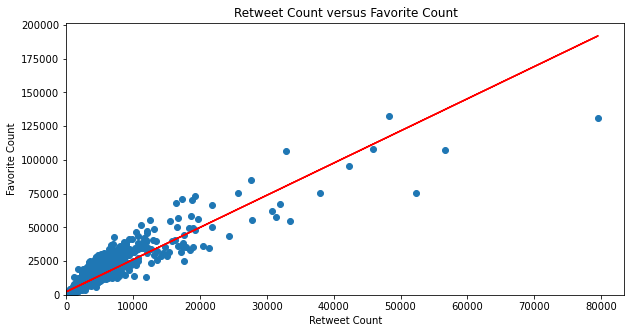

In [71]:
#add points and plot
x1 = df['retweet_count']
y1 = df['favorite_count']
plt.figure(figsize=(10,5))
plt.scatter(x1, y1)

# line of best fit
a, b = np.polyfit(x1, y1, 1)

# add line of best fit to plot
plt.plot(x1, a*x1+b, color='red')

# scatterplot qualities
plt.title('Retweet Count versus Favorite Count', color='black')
plt.ylim(bottom=0)
plt.xlim(left=0)
plt.xlabel('Retweet Count',color='black')
plt.ylabel('Favorite Count',color='black')
plt.show()